### Problem: Prediction of the type of skin disease

##### IMPORTING LIBRARIES



In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


##### LOADING THE DATASET



In [2]:

data = pd.read_csv('data.csv')

##### BASIC CHECKS


In [3]:
pd.set_option("display.max_columns",100)


In [4]:
# Reading Ist five rows
data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


### What data tells?

### Class Distribution

1 means\-\-\- ' psoriasis' skin disorder. 

2 means\-\-\- ' seboreic dermatitis' skin disorder.

3 means\-\-\- ' lichen planus' skin disorder.

4 means\-\-\- ' pityriasis rosea' skin disorder.

5 means\-\-\- ' cronic dermatitis' skin disorder.

6 means\-\-\- ' pityriasis rubra pilaris' skin disorder.

#### Features Containing values which ranges from 0\-3

###### FEATURES ARE BASICALLY NAMED AS SYMPTOMS

0 indicates that the feature was not present

3 indicates the largest amount possible

1, 2 indicate the relative intermediate values.

#### Family Feature Contains

1\-\-&gt; If any of these diseases has been observed in the family

0\-\-&gt; Not there in the family.



In [5]:


data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

Feature "Age" is in object type

All other features are of integer type


In [7]:

# Some statistical analysis
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


Almost every feature contains 4 unique values 0,1,2,3.

Min. value is 0 and Max. value is 3

366 observations are present in this dataset.

No constant column is there in dataset.

In [8]:
data.describe(include="object")


,Age
count,366
unique,61
top,40
freq,17


Total no. of observations are 366.

61 unique observations are there in "Age" feature.

17 observations are there of "Age = 50".


In [9]:
data.shape


(366, 35)

This dataset includes 366 samples/observations and 35 columns.


In [10]:
data.size


12810

Total number of observed values present in the dataset. (no. of rows(366) * no. of columns(35))


### DOMAIN ANALYSIS

Target column: Class i.e. there are 6 types of skin disorder present in this dataset.:

'1' is representing Psoriasis  

'2' is representing Seboreic Dermatitis

'3' is representing Lichen Planus  

'4' is representing Pityriasis Rosea  

'5' is representing Cronic Dermatitis  

'6' is representing Pityriasis Rubra Pilaris  

### What is a Skin Disorder?

- A skin condition or skin disorder, also known as cutaneous condition, is any medical condition that affects the integumentary system—the organ system that encloses the body and includes skin, nails, and related muscle and glands.
- The major function of this system is as a barrier against the external environment.
- The skin weighs an average of 4 kg \(8.8 lb\), covers an area of 2 m2 \(22 sq ft\), and is made of three distinct layers:
  - The epidermis
  - dermis
  - subcutaneous tissue.



### Class : representing six type of skin disorder

1. Psoriais

Psoriasis is a skin disease that causes a rash with itchy, scaly patches, most commonly on the knees, elbows, trunk and scalp.

Psoriasis is a common, long\-term \(chronic\) disease with no cure. It can be painful, interfere with sleep and make it hard to concentrate.

The condition tends to go through cycles, flaring for a few weeks or months, then subsiding for a while.

Psoriasis is thought to be an immune system problem.

The most common symptom is a rash on the skin, but sometimes the rash involves the nails or joints.


2. Seboreic Dermatitis

Seborrheic dermatitis is a common skin disease that causes an itchy rash with flaky scales.

It causes redness on light skin and light patches on darker skin.

It’s also called dandruff, cradle cap, seborrhea, seborrheic eczema, and seborrheic psoriasis.

It might look similar to psoriasis, eczema, or an allergic reaction.

It usually happens on your scalp, but you can get it anywhere on your body.


3. Lichen Planus

Lichen planus \(LIE\-kun PLAY\-nus\) is a condition that can cause swelling and irritation in the skin, hair, nails and mucous membranes.

On the skin, lichen planus usually appears as purplish, itchy, flat bumps that develop over several weeks.

Lichen planus is not a dangerous disease, and it usually goes away on its own.


4. Pityeiasis Rosea

Pityriasis rosea is a rash that usually begins as a large circular or oval spot on your chest, abdomen or back. Called a herald patch, this spot can be up to 4 inches \(10 centimeters\) across.

In most cases, pityriasis rosea is harmless and doesn't return after it goes away.

If your case lasts longer than 3 months, check in with your doctor. You may have another condition or be reacting to a medication


5. Cronic Dermatitis

Atopic dermatitis \(eczema\) is a condition that makes your skin red and itchy.

It's common in children but can occur at any age. Atopic dermatitis is long lasting \(chronic\) and tends to flare periodically.

It may be accompanied by asthma or hay fever. No cure has been found for atopic dermatitis.


6. Pityriasis Rubra Pilaris

Pityriasis rubra pilaris \(PRP\) is the name given to a group of rare skin disorders that present with reddish\-orange coloured scaling patches with well\-defined borders.

They may cover the entire body or just parts of the body such as the elbows and knees, palms and soles.

The classic forms usually go away in 3 to 5 years with or without treatment.

This usually occur during early childhood or at the age of 50\-70 yrs.


a.\) Clinical Attributes:

1. erythema:

Erythema is redness of the skin caused by injury or another inflammation\-causing condition. Often presenting as a rash, erythema can be caused by environmental factors, infection, or overexposure to the sun \(ie, sunburn\).

Rash severity ranges from mild to life threatening.

Erythema multiforme \(EM\) is the most common type of erythema.

There are two types of EM, minor and major.

Erythema multiforme minor \(EM minor\) typically occurs on the peripheral parts of the body,

EM major causes extensive, blistering sores on the lips and in the mouth. They can also appear on the eyes and genitals.

Erythema multiforme usually occurs in adults 20 to 40 years of age, although it can occur in patients of all ages


2. scaling:

Scaling skin is the loss of the outer layer of the epidermis in large, scale\-like flakes. The skin appears dry and cracked, though skin dryness isn't always to blame. Scaling skin is also called: desquamation. dropping of scales.


3. definite\_borders:

benign mole borders that tend to be smooth and even\(regular\), early melanoma borders possess uneven \(irregular\) borders.


4. Itching:

Pruritus simply means itching. It can be associated with a number of disorders, including dry skin, skin disease.


4. koebner\_phenomenon:

is the appearance of new skin lesions on previously unaffected skin secondary to trauma.


5. polygonal\_papules:

Papules and polygonal plaques are shiny, flat\-topped and firm on palpation. The plaques are crossed by fine white lines called Wickham striae. Hypertrophic lichen planus can be scaly. Atrophic lichen planus is a rare annular variant with an atrophic centre.


6. follicular\_papules:

Follicular contact dermatitis is usually characterized by individual papules that include a central hair follicle.

A follicular papule occurs when the inflammatory infiltrate accumulates within the epidermis of the follicle or in the perifollicular dermis. B. A nonfollicular papule is located within the skin, but is not associated with a hair follicle.


7. oral\_mucosal\_involvement:

Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone.


8. knee\_and\_elbow\_involvement:

Extensor surfaces are skin surfaces on the outside of a joint that are common regions for lesions or other skin changes in certain skin disorders.

For example, the front of the knee and the back of the elbow or forearm are extensor surfaces where inflamed skin and scaly patches of psoriasis may develop.


9. scalp\_involvement:

Scalp involvement in pemphigus is associated with a higher disease severity, longer time required to achieve complete clinical and serological remission and may indicate the need for a more aggressive therapeutical approach.


b.\) Histopathological Attributes:

10. melanin\_incontinence:

Melanin incontinence \(pigmentary incontinence\) is the presence of melanin in the superficial dermis, due to the loss of melanin from damaged cells of the basal layer.

11. eosinophils\_in\_the\_infiltrate:

Pulmonary eosinophilia \(PE\) is defined as infiltration of eosinophils into the lung compartments constituting airways, interstitium, and alveoli. Various infections, drugs, parasites, autoimmune processes, malignancies and obstructive lung diseases have been associated with increased eosinophils in the lungs.


12. fibrosis\_of\_the\_papillary\_dermis:

Papillary dermal fibrosis with vertical streaking of collagen bundles is characteristic. A characteristic finding of lichen simplex chronicus that is noted on electron microscopy is frequent collagen fibers attached to and just above the lamina basalis. Increased numbers of blood vessels can be encountered.

13. exocytosis:

Exocytosis is the last step of the secretory pathway and it involves the fusion of vesicles with the plasma membrane, a process that, in fungi, ensures the delivery of cell wall\-synthesizing enzymes, membrane proteins, and lipids in areas of active growth.

14. acanthosis:

Acanthosis nigricans is a skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck.

15. hyperkeratosis:

A condition marked by thickening of the outer layer of the skin, which is made of keratin \(a tough, protective protein\). It can result from normal use \(corns, calluses\), chronic inflammation \(eczema\), or genetic disorders \(X\-linked ichthyosis, ichthyosis vulgaris\).

16. parakeratosis:

Parakeratosis is defined as the presence of nucleated keratinocytes in the stratum corneum, and is thought to be due to accelerated keratinocytic turnover. Parakeratosis may occur in both benign skin diseases \(such as various dermatitides\) and malignant neoplasms \(such as squamous cell carcinoma\).

17. clubbing\_of\_the\_rete\_ridges:

This is the microscopic appearance of lentigo senilis, commonly known as an age or "liver" spot. The rete ridges are elongated and appear club\-shaped or tortuous. Melanocytes are increased in the basal layer and melanophages appear in the upper dermis.

18. elongation\_of\_the\_rete\_ridges:

Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis

19. thinning\_of\_the\_suprapapillary\_epidermis:

This was defined as a thinning of the granular layer at the tips of the papillae. The elongation of the rete pegs was also considered in this factor. It was graded on a visual analogue scale as 0 to 3 \(nil to marked\)

20. spongiform\_pustule:

an epidermal pustule formed by infiltration of neutrophils into necrotic epidermis in pustular psoriasis.

21. munro\_microabcess:

Munro's microabscess is an abscess \(collection of neutrophils\) in the stratum corneum of the epidermis due to the infiltration of neutrophils from papillary dermis into the epidermal stratum corneum.

22. focal\_hypergranulosis:

Hypergranulosis is an increased thickness of the stratum granulosum. It is seen in skin diseases with epidermal hyperplasia and orthokeratotic hyperkeratosis.

23. disappearance\_of\_the\_granular\_layer:

H&E staining revealed slight acanthosis and multiple parakeratotic column with disappearance of the granular layer.

Disapperence of stratum granulosum or granular layer that is a thin layer of cells in the epidermis lying above the stratum spinosum and below the stratum corneum \(stratum lucidum on the soles and palms\).

24. damage \_ of \_ bassal \_ layer

The basal layer is the innermost layer of the epidermis, and contains small round cells called basal cells.

25. spongiosis

Spongiotic dermatitis refers to dermatitis that involves fluid buildup in your skin.This process is known as spongiosis.

26. saw \_ tooth\_ appearance \_ of \_ retes

The meaning of SAW\-TOOTHED is having teeth like those of a saw

RETES\-\-\-a network of intersecting blood vessels or intersecting nerves or intersecting lymph vessels.

27. perifollicular \_ hyperkeratosis

Perifollicular hyperkeratosis, follicular hemorrhage, and corkscrew hairs are well\-known cutaneous manifestations of ascorbic acid deficiency, along with xerosis, ecchymosis, edema, poor wound healing, and gingival hemorrhage.

28. follicular hyperkeratosis:

Also known as inverted follicular hyperkeratosis, this condition presents as a single bump, often on the face, of middle\-aged or older adults.

These growths are benign \(noncancerous\), but they often look like cancerous lesions.

29. band like infiltrate:

An infiltrate of lymphocytes affects and obscures the basal epidermis, classically with a band like pattern.

Sometimes the infiltrate is patchy.

There is associated basal cell degeneration.

Typical of eczema, the epidermis shows patchy spongiosis, nearly always with associated exocytosis of lymphocytes.



### CORRUPT DATA HANDLING



In [11]:
data.loc[data['Age']=="?","Age"]=np.nan


In [12]:
data[["Age"]]=data[["Age"]].astype("float64")


### EXPLORATORY DATA ANALYSIS:



###### FIRSTLY CONVERTING THE VALUES OF CLASS TO NAMES OF SKIN DISORDER FOR BETTER UNDERSTANDING OF EDA



In [13]:
data["class"]=data['class'].map({1:'psoriasis',
                           2:'seboreic_dermatitis', 
                           3:'lichen_planus', 
                           4:'pityriasis_rosea', 
                           5:'cronic_dermatitis', 
                           6:'pityriasis_rubra_pilaris'
                        })

###### VISUALIZING THE TARGET FEATURE



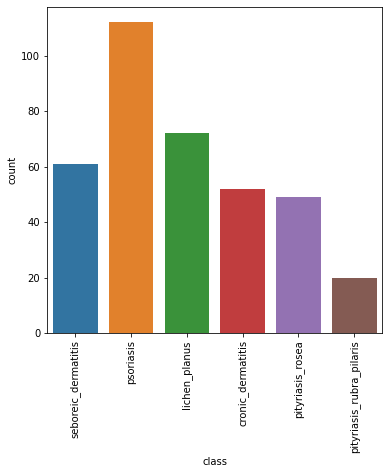

In [14]:
plt.figure(figsize=(6,6), facecolor='white')
sns.countplot(x=data["class"])
plt.xticks(rotation=90)
plt.show()

According to dataset it can be seen that there are highest number of people who are suffering from " psoriasis " skin disorder.

30% of data is covered by this skin disorder only.

Skin disorders namely " seboreic_dermatitis" , " lichen_planus " , " cronic_dermatitis " and "pityriasis_rosea " heave intermediate range of affecting.

If we talk about " pityriasis_rubra_pilaris " skindisorder , it has least value of affecting to the people.

CHECKING IF AGE MATTERS IN DETECTING THE TYPE OF SKIN DISORDER


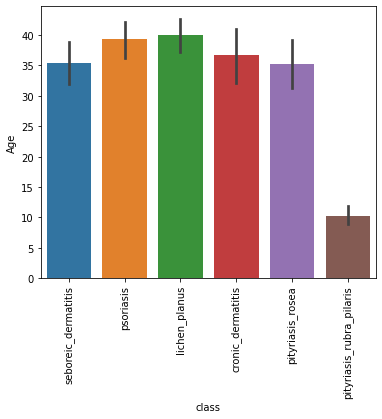

In [15]:
plt.figure(figsize=(6,5), facecolor='white')
sns.barplot(x=data["class"],y=data["Age"])
plt.xticks(rotation=90)
plt.show()

The main thing we can conclude from this comparision that "pityriasis\_rubra\_pilaris" skin disorder effects almost 0 \- 10 years age group people.

It means this skin disorder only affects children.

Where as rest 5 skin disorders can take place at any age.


ERYTHEMA, SCALING AND CLASS



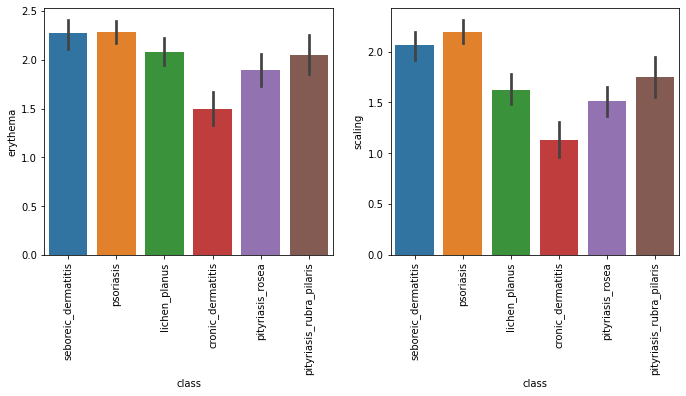

In [16]:
data1=data[["erythema","scaling"]]
plt.figure(figsize=(30,10), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
        plt.xticks(rotation=90)
    plotnumber+=1  

plt.show()

In all type of skin disorders intermediate level of Scaling and Erythema is present as no observation exceeding 2.5

But comparatively, less in cronic\_dermatitis skin disorder.


THOSE IMPORTANT FEATURES/SYMPTOMS, ON THE BASIS OF WHICH WE CAN SAY THAT THIS PATIENT MAY HAVE THIS DISEASE

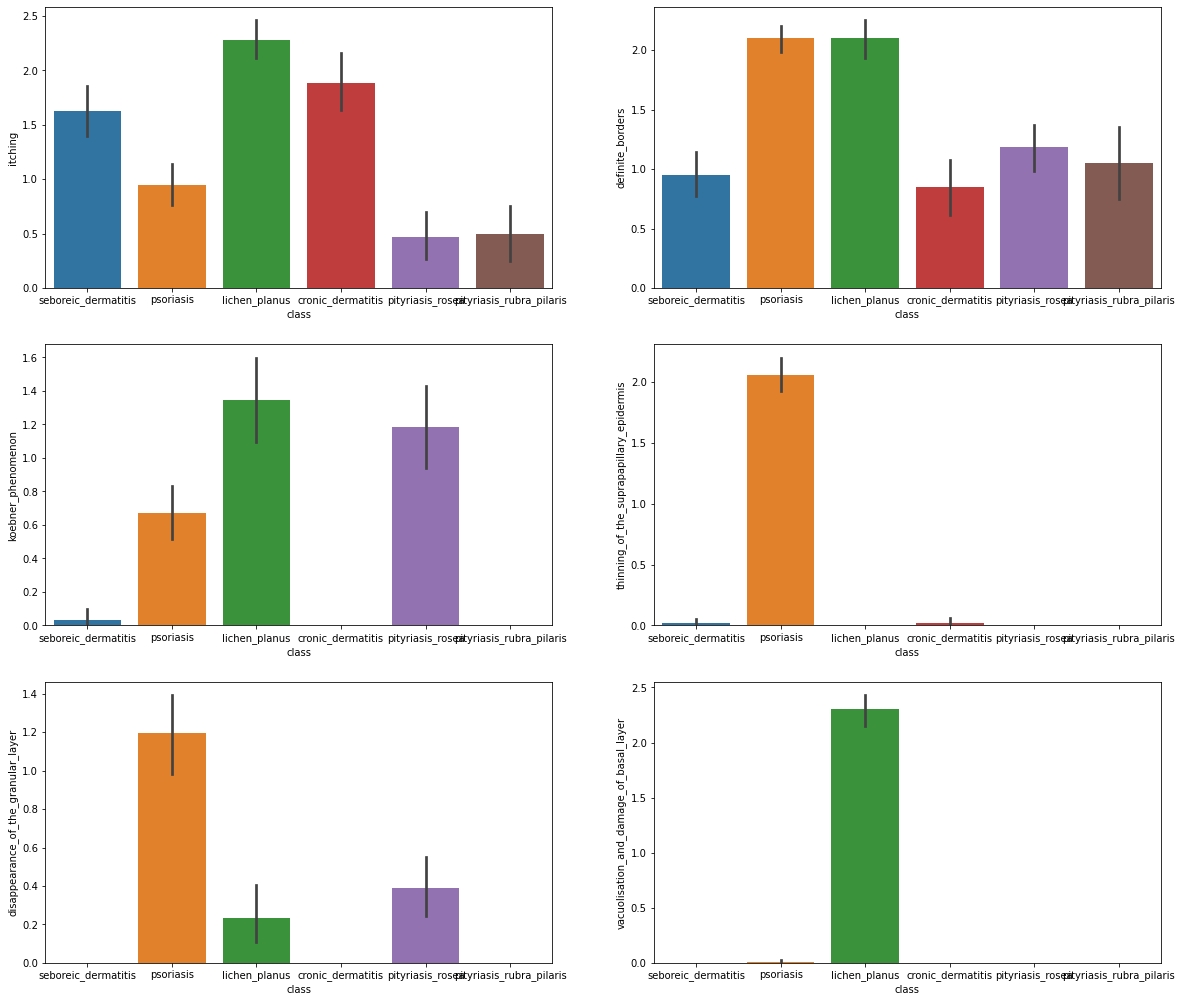

In [17]:
data1=data[["itching",'definite_borders','koebner_phenomenon','thinning_of_the_suprapapillary_epidermis','disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer']]
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")

    plotnumber+=1

plt.show()

1.ITCHING

Lichen\_planus skin disorder have high effect from itching followed by cronic\_dermatitis skin disorder, it means

If a person is getting more itching then there may be more chances that he has Lichen\_planus or cronic\_dermatitis skin disorder .

Rest other skin disorders have intermediate level of itching effect.

Whereas the skin disorder namely "pityriasis\_rosea" and "pityriasis\_rubra\_pilaris" have minor affect of itching

2.DEFINITE BORDERS

When person have a skin disorder of "psoriasis" and "lichen planus" then person have their definate border of the skin means it does not affect the borders of skin , border of thier skin remain regular in shape.

Where as other skin disorders make the border of skin in irregular shape.

3.KOEBNER PHENOMENON \( Appearance of new skin to abnormal skin like birthmarks etc\)

Manytimes in the case of "lichen planus" and "pityriasis\_rosea" skin disorder , this phenomenon takes place.

And sometimes in psoriasis also.

4.THINNING OF SUPRAPAPILLARY EPIDERMIS\( Some areas of body like palms amd soles\) AND DISAPPEARE OF GRANULAR LAYER

our graph says that if our suprapapillary epidermis get thinned and granular layer get disappeared than 90% chance of "psoriasis" skin disorder.

5.DAMAGE OF BASAL LAYER\( basal layer is the innermost layer of the epidermis\)

When we have damage of basal layer in our skin then the most chance of suffering from "lichen planus " skin disorder.



CONNECTION OF KNEE,ELBOW AND SCALP WITH SKIN DISORDERS



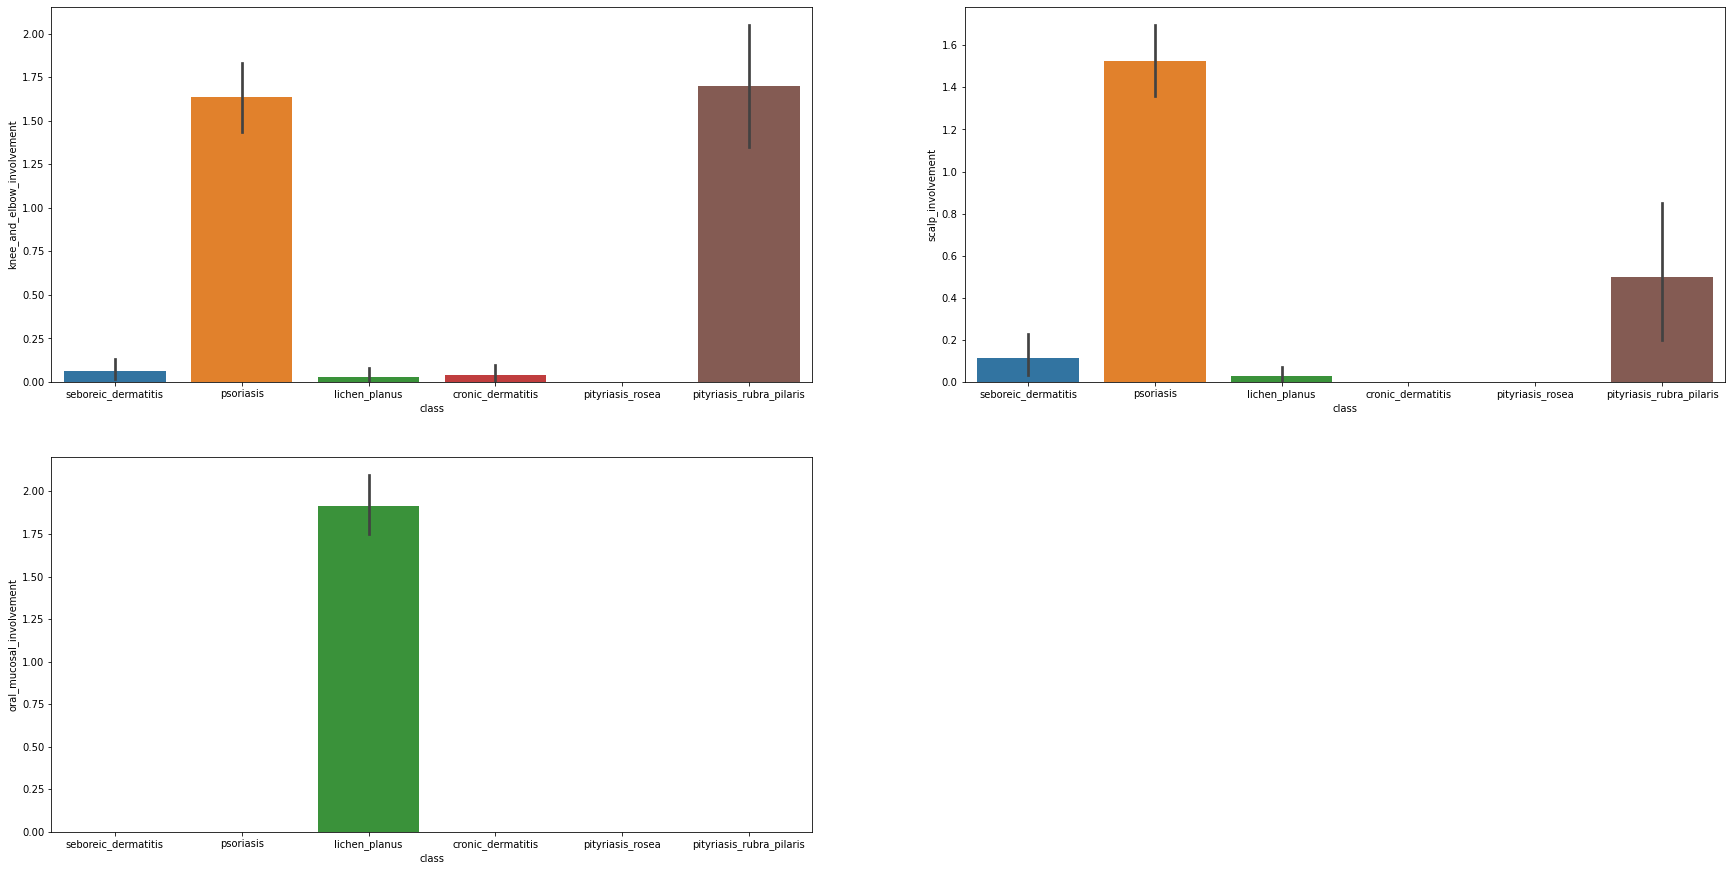

In [18]:
data1=data[["knee_and_elbow_involvement","scalp_involvement",'oral_mucosal_involvement']]
plt.figure(figsize=(30,40), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel('class')
    plotnumber+=1

plt.show()


Here if we talk about "pityriasis\_rubra\_pilaris" skin disorder it highly affect the knees, elbows and sometimes scalp is well.

Whereas 90% "psoriasis" skin disorder takes place in all these three body parts that is kness,elbows and scalp.

Only "lichen\_planus" skin disorder is have symptom in the mouth \(oral\_mucosal\_involvement\). This give rise to swelling to the many parts of mouth like lips .

Rest other skin disorders takes place on other body parts.


TYPES OF PAPULES' EFFECT ON SKIN DISORDER


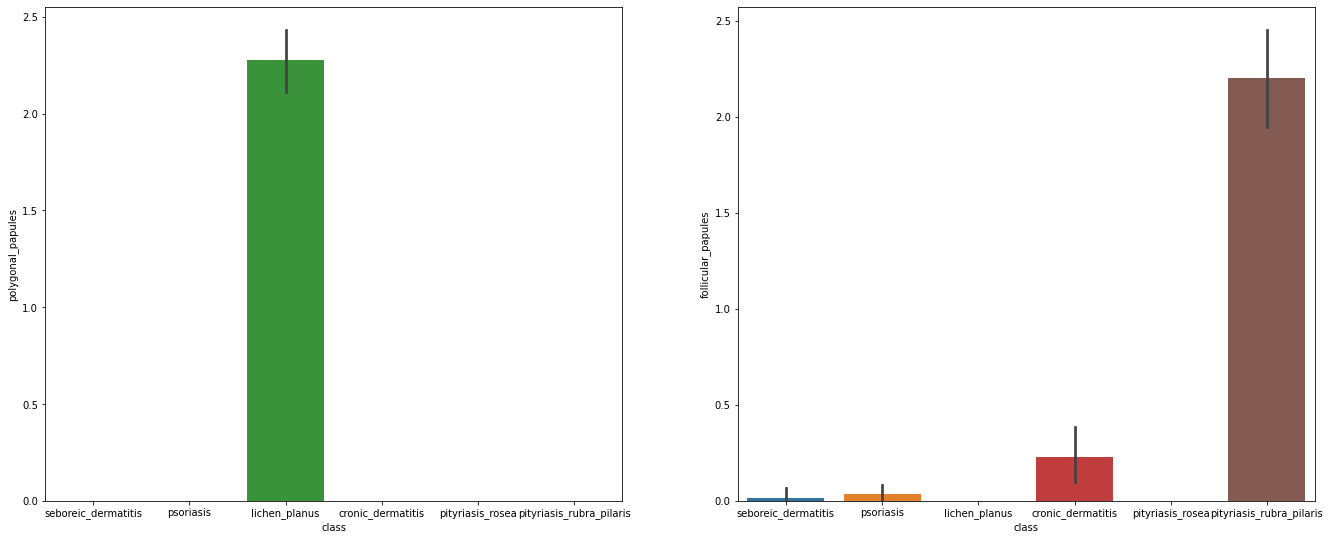

In [19]:
data1=data[['polygonal_papules', 'follicular_papules']]
plt.figure(figsize=(60,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1

plt.show()

Only "lichen_planus" skin disorder is affected by polygonal_papules, it means that if a person have polygonal_papules it is a symptom of "lichen_planus72" skin disorder.

If we talk about "pityriasis_rubra_pilaris20" skin disorder it has symptom of follicular_popules

NOTE : Well "lichen\_planus" is not a dangerous skin disorder but if you get a symptom of follicular\_popules it means you have chance to have "pityriasis\_rubra\_pilaris" skin disorder , which can long last upto 5 years , so you have to concern to doctor immediately


HOW PRESENCE OF EOSINOPHILS , PNL , MONONUCLEAR IN THE BODY helps in detecting SKIN Disease


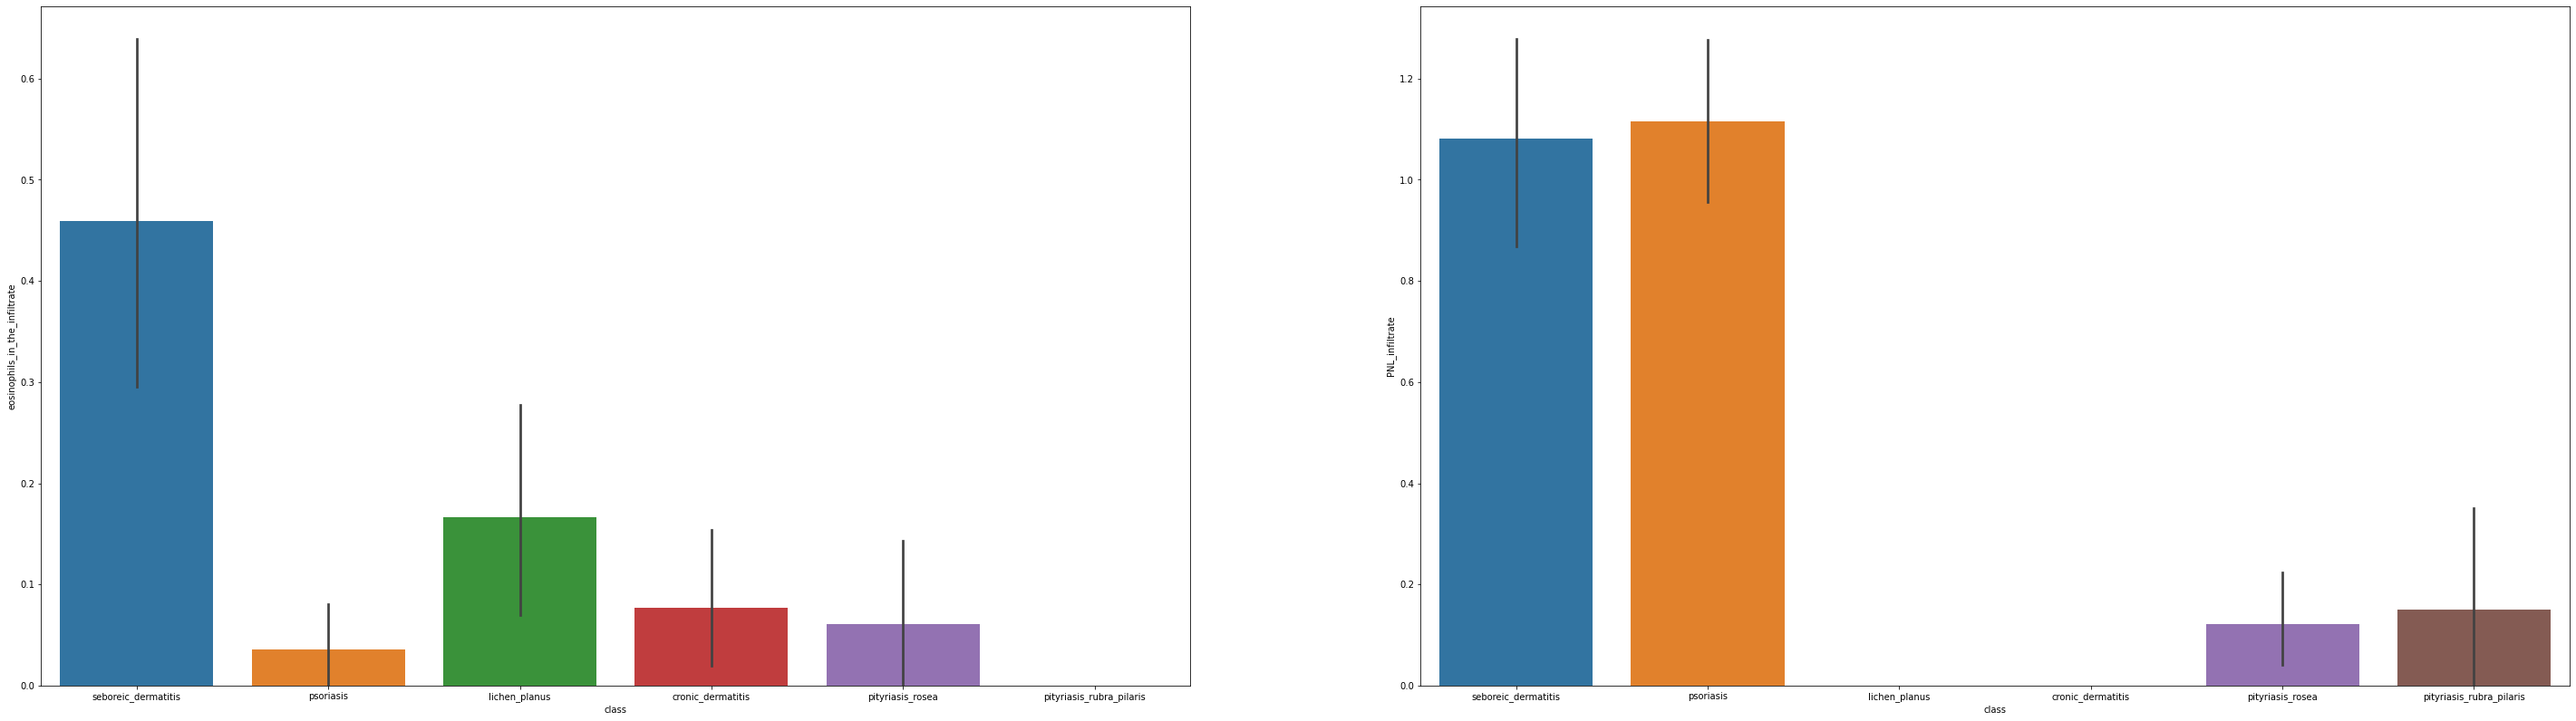

In [20]:
data1=data[['eosinophils_in_the_infiltrate', 'PNL_infiltrate']]
plt.figure(figsize=(50,80), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1

plt.show()

INFILTRATE EOSINOPHILLS

These are white blood cells entering the lungs.

If you look closely at the graph, the values of this process are less than 0.5, which suggests that eosinophil infiltration is very low in all types of skin disorders. Accordingly, we may conclude that this process has little influence on a person's likelihood of developing a skin illness.

PNL INTERFERE

This is evidence of a large stone in the body.

Apart from "seboreic dermatitics" and "psoriasis," PNL infiltration process does not significantly affect other skin conditions.

It immediately affects skin conditions including psoriasis and seboreic dermatitis.


IMPACT OF MELANIN AND ACANTHOSIS ON SKIN DISORDER


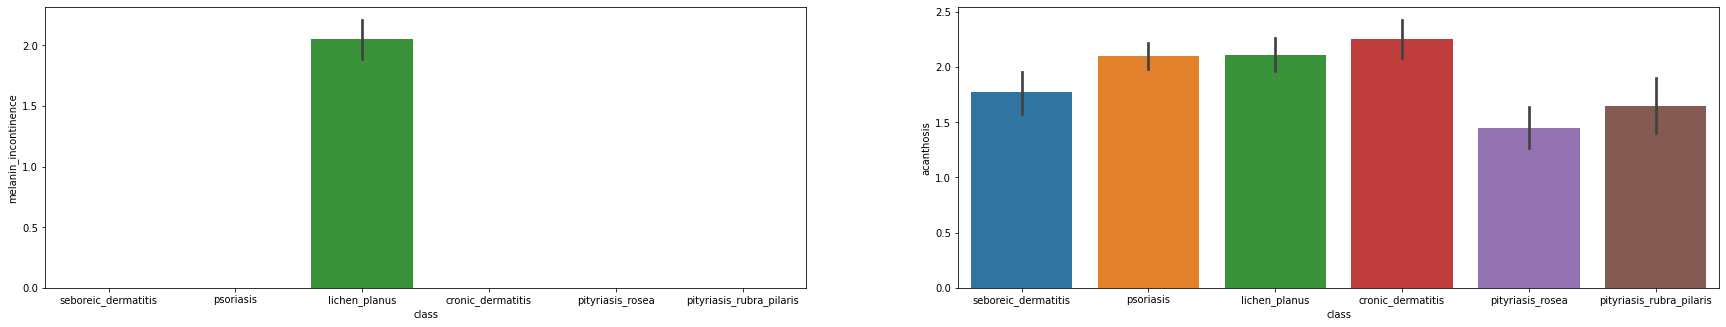

In [21]:
data1=data[["melanin_incontinence",'acanthosis']]
plt.figure(figsize=(30,30), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

MELANIN INCONTIENENCE

Melanin is a pigment that is found in people's hair, skin, and eye iris. It ranges in color from dark brown to black.

Melanin\-related symptoms increase our risk of developing the skin condition lichen planus.

ACANTHOSIS

This is not very informative because acanthosis is present in all skin disorders.


### HOW SKIN DISORDER PRESENT IN THE FAMILY EFFECTS


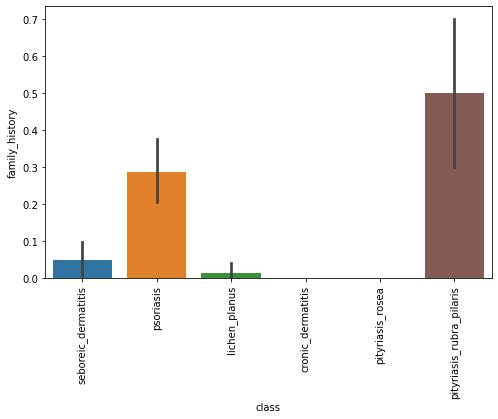

In [22]:

plt.figure(figsize=(8,5),facecolor="white")
sns.barplot(x=data["class"],y=data["family_history"])
plt.xticks(rotation=90)
plt.show()


There is more change of suffering from "pityriasis_rubra_pilaris" skin disorder if their parents have same skin disorder and that is the only reason this disorder mostly suffered by childern.

Sometimes "Psoriasis" skin disorder can also takes place from family to thier children.

There are also minor cases of "seboris dermatitis" amd "lichen planus" which occur from parents to their children

### EFFECT TO SKIN DISORDERS BY THE PROCESSESS WHICH MAKE SKIN CELLS


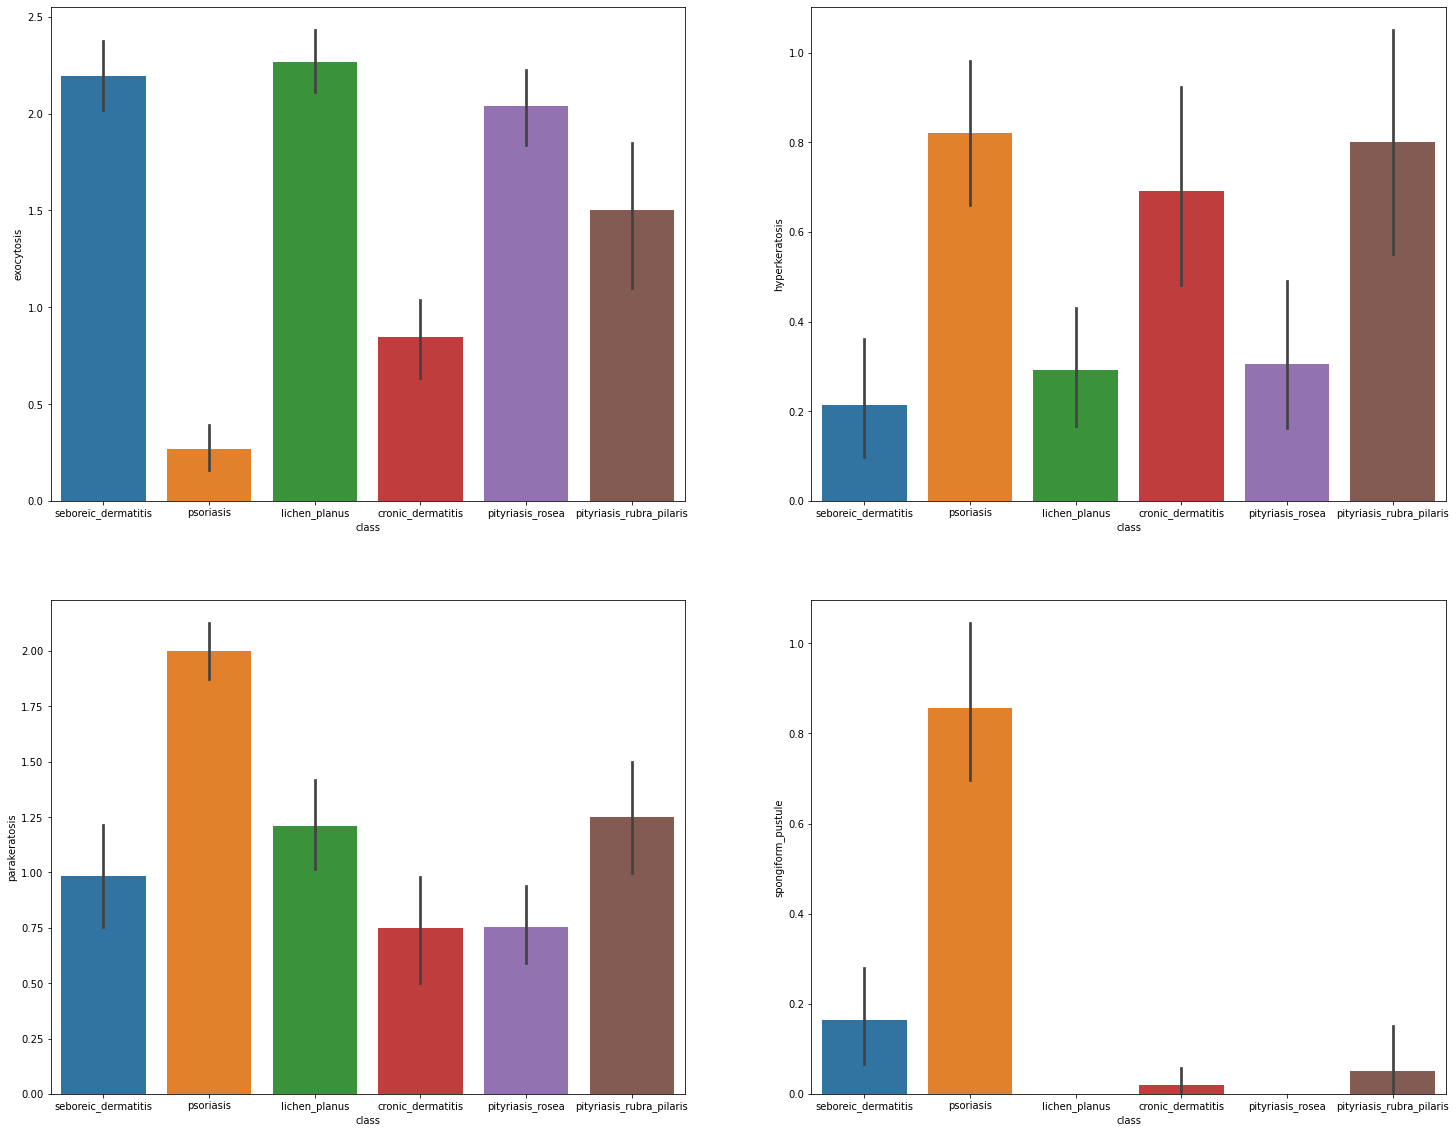

In [23]:
data1=data[['exocytosis','hyperkeratosis', 'parakeratosis','spongiform_pustule']]
plt.figure(figsize=(25,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

If we talk about features Hyperkeratosis and Spongiform postule , these are not much affecting any skin disorder baecause these have less value range that is below 1.

EXOCYTOSIS

Exocytosis is a form of active transport and bulk transport in which a cell transports molecules out of the cell.
Skin disoreders such as "lichen_planus" , "ptyriasis_rosea" and "seboreic dermatis " get more affect by Exocytosis symptom comparitevy to others.
"pityriasis_ruba_pilaris" disorder have intermmediate effect of this process.
Rest have minor effects.

PARAKERATOSIS

Parakeratosis is defined as the presence of nucleated keratinocytes(cells which make keratin)
All skin disorders have intermediate effect of it.

REMAINING FEATURE ANALYSIS


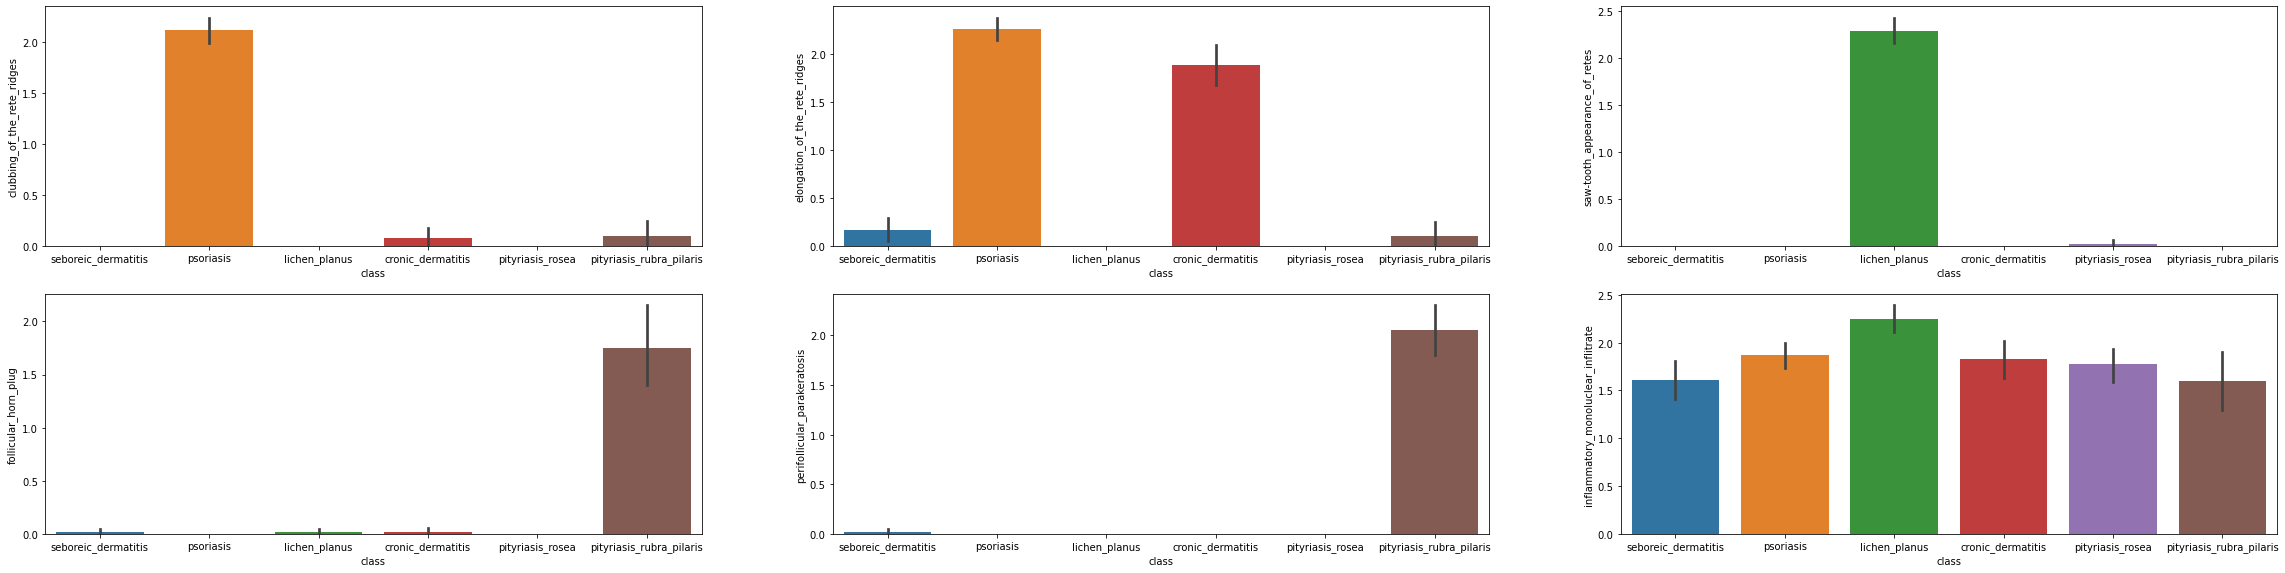

In [24]:
data1=data[['clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges','saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate']]
plt.figure(figsize=(40,15), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(3,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


### IMPACT OF SPONGIOSIS TO SKIN DISORDER


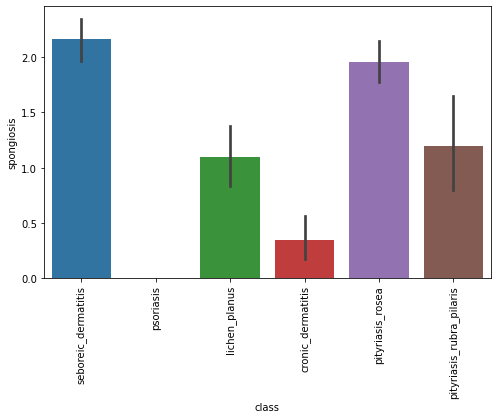

In [25]:
plt.figure(figsize=(8,5),facecolor="white")
sns.barplot(x=data["class"],y=data["spongiosis"])
plt.xticks(rotation=90)
plt.show()

Spongiotic dermatitis refers to dermatitis that involves fluid buildup in your skin.This process is known as spongiosis.

Spongiosis highly give affect to "seboreic_dermatitis " disorder.

Skin disorders like "pityruais_rosea", "pityriasis_rubra_pilaris" ," lichen_planus" are imtermediately affect by spongiosis.

### FEATURES THAT EFFECTING THE MOST TO THE PARTICULAR SKIN DISORDER

1. PSORIASIS
FEATURES GIVEN BELOW EFFECT THIS SKIN DISORDER MOST

scalp_involvement

parakeratosis

thinning_of_the_suprapapillary_epidermis

clubbing_of_rete_ridges

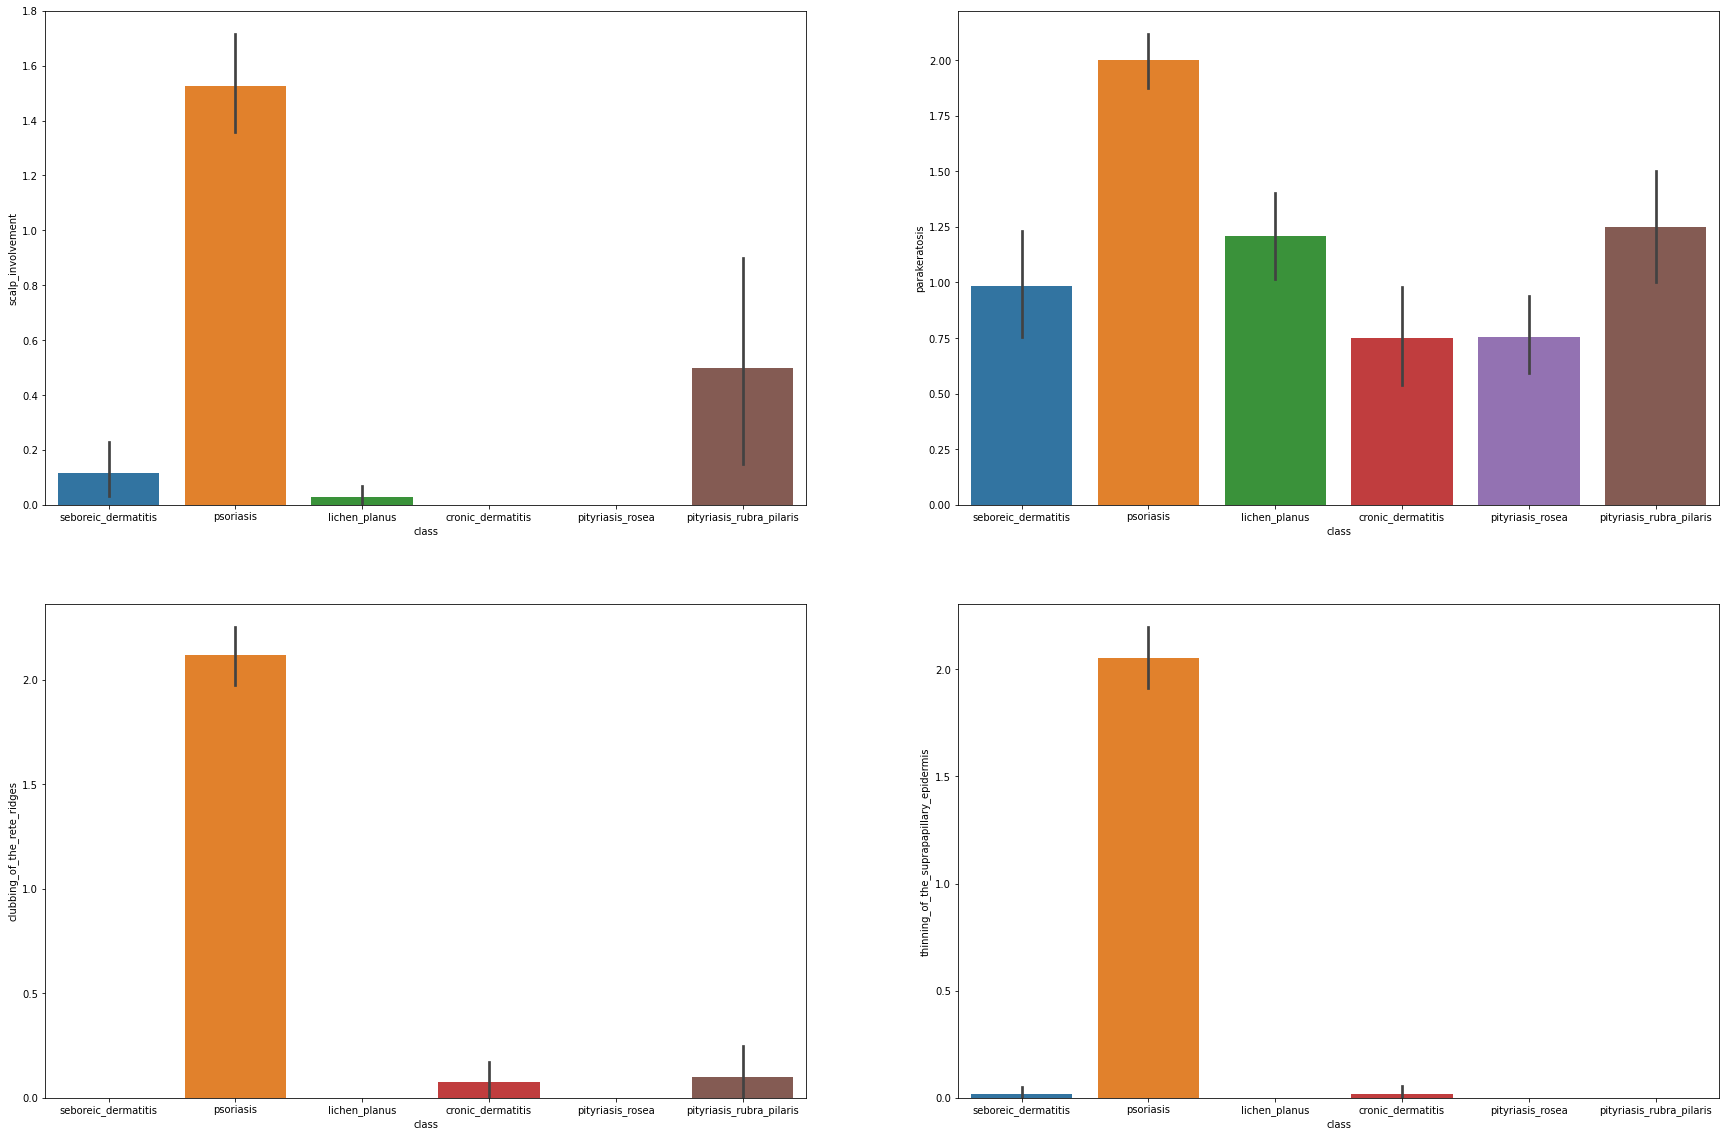

In [26]:
data1=data[["scalp_involvement","parakeratosis","clubbing_of_the_rete_ridges","thinning_of_the_suprapapillary_epidermis"]]
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

In every graph above, the bin of "psoriasis "(orange bin) skin disorder is high.
Hence we can conclude that this skin disorder is highly effected by these features.

2. SEBOREIC_DEREMATITIS

FEATURES GIVEN BELOW EFFECTS THIS SKIN DISORDER MOST

exocytosis

spongiosis

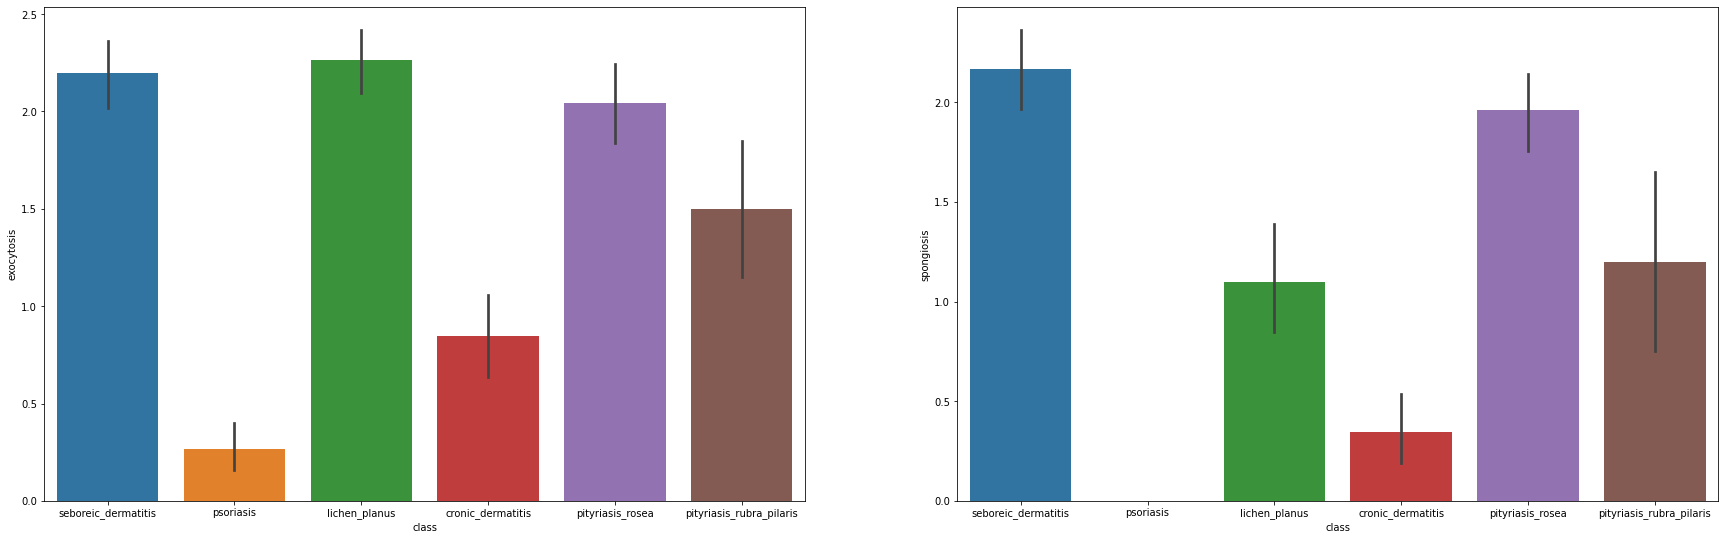

In [27]:
data1=data[["exocytosis","spongiosis"]]
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


Here in each graph "seboreic_derematatis" skin disorder bin(blue bin) is high and its value is more than 2.
Hence we conclude that this disorder is highly effected by these featutes

3. LICHEN_PLANUS
FEATURES GIVEN BELOW EFFECTS THIS SKIN DISORDER MOST

polygonal_papules

oral_mucosal_involvement

vacuolisation_and_damage_of_basal_layer

melanin_incontinence

exocytosis

saw-tooth_appearance_of_retes

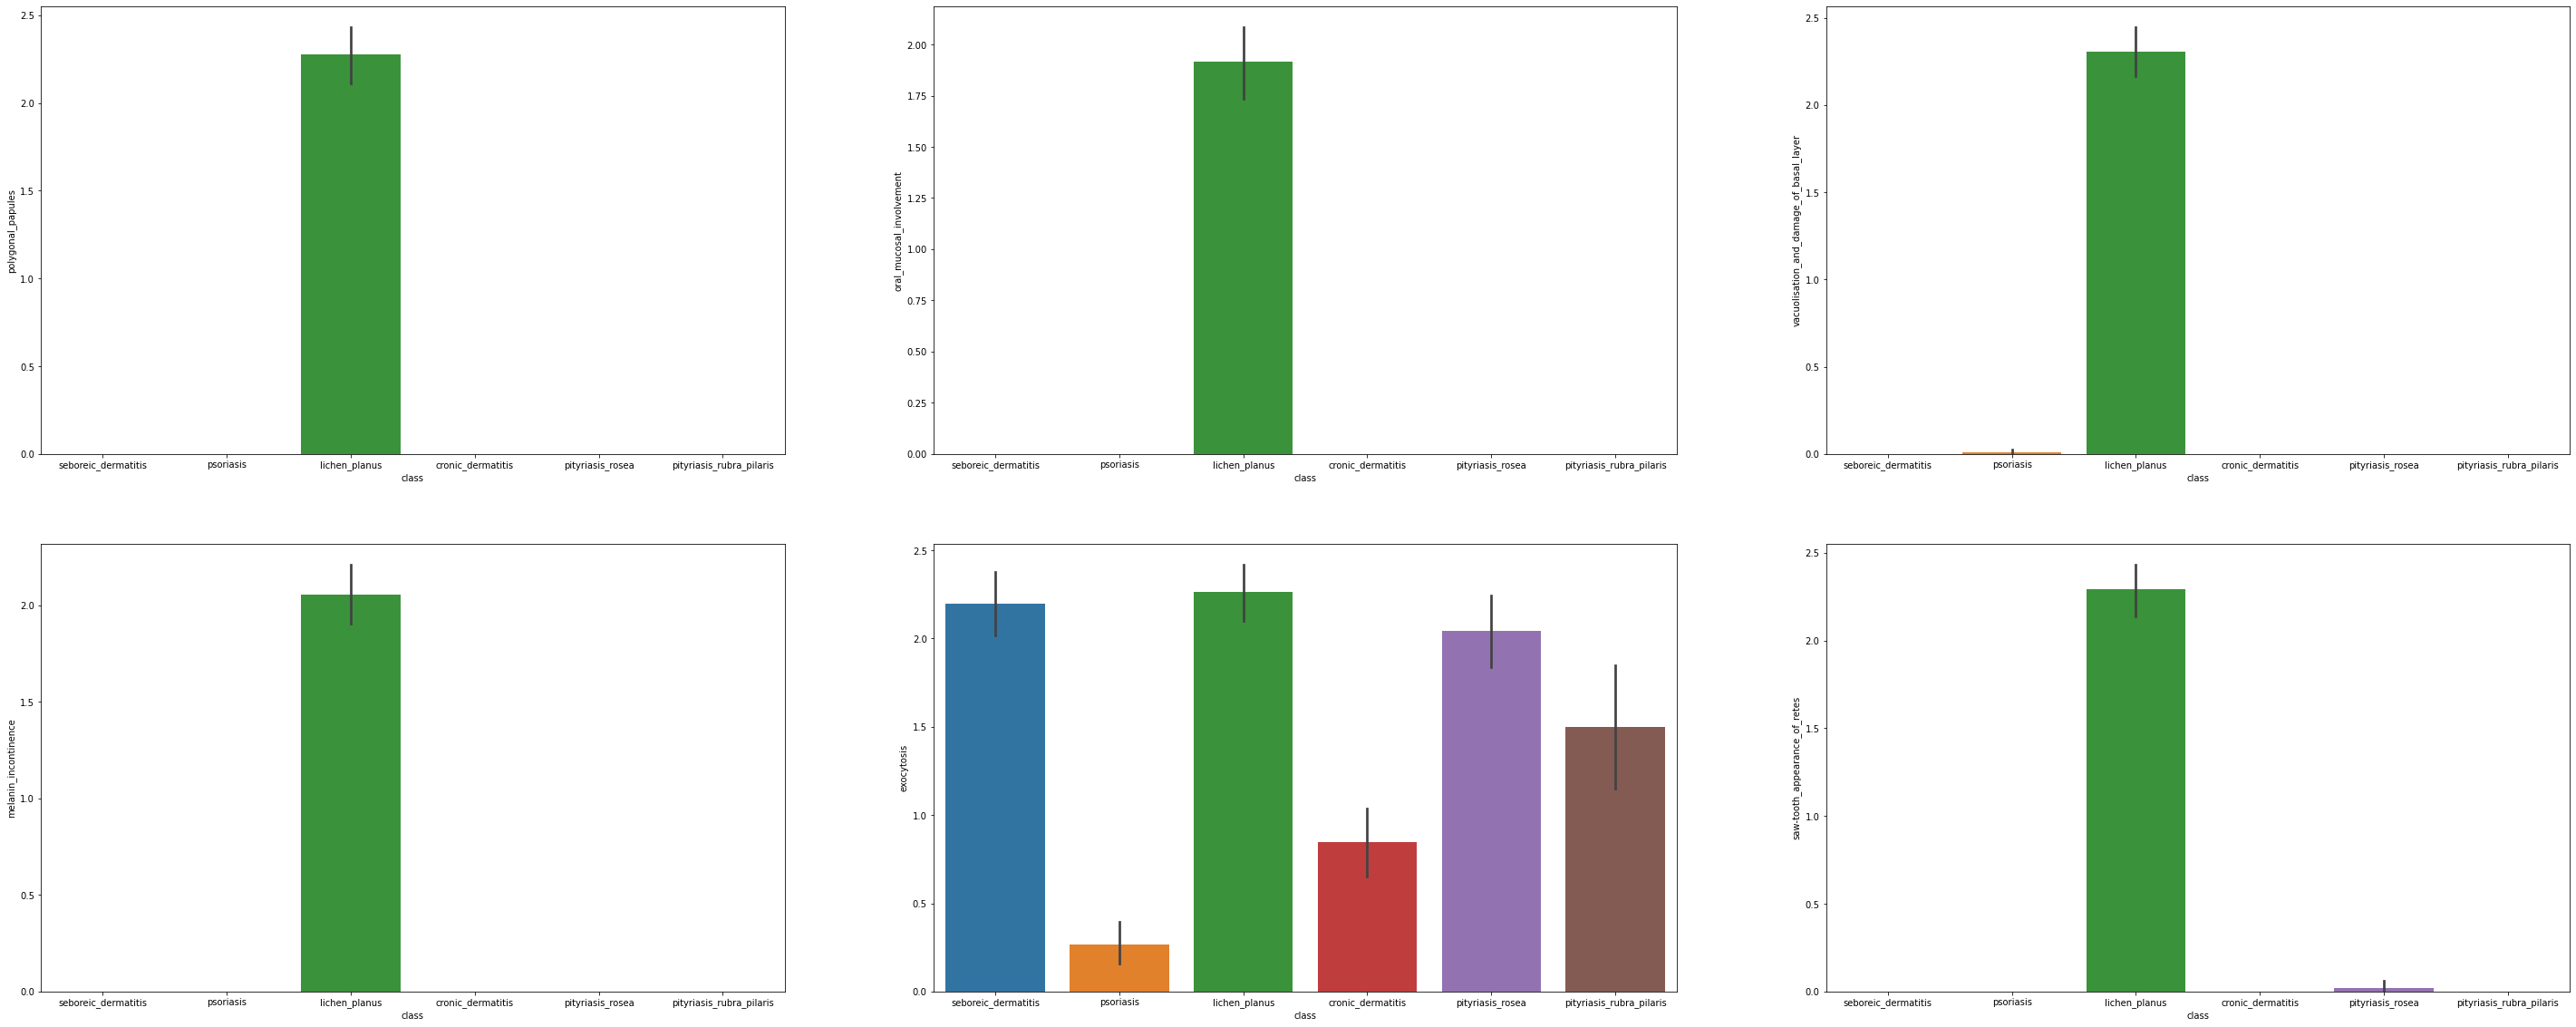

In [28]:
data1=data[[ "polygonal_papules",
"oral_mucosal_involvement",
"vacuolisation_and_damage_of_basal_layer",
"melanin_incontinence",
"exocytosis",
"saw-tooth_appearance_of_retes"]]
plt.figure(figsize=(50,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"],)
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


Here, in each graph "lichen_planus" skin disorder's bin is high(green bin) .
Hence we conclude that this disorder is highly effected by these featutes

4. PITYRIASIS_ROSEA

FEATURES THAT EFFECT THIS SKIN DISORDER IS GIVEN BELOW

exocytosis

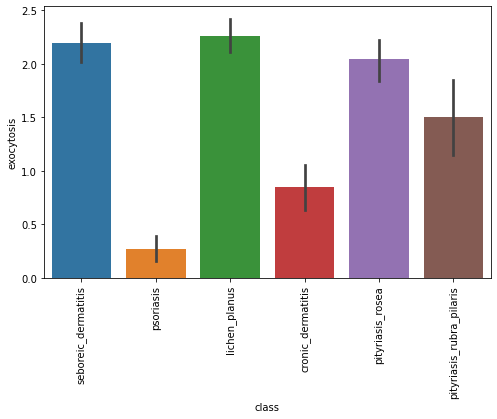

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=data["class"],y=data["exocytosis"])
plt.xticks(rotation=90)
plt.show()


There is only one column namely exocytosis is efecting this skin disorder more. Although this is effecting another features as well.

If you see the exocytosis bin at "pityriasis_rosea" has value more than 2 it means more amount of exocytosis symptom is present in this skin disorder.

Hence, it is affecting this skin disorder.

5.CRONIC_DERMATITIS

COLUMNS THAT EFFECTS THIS SKIN DISORDER ARE GIVEN :

elongation_of_the_rete_ridges

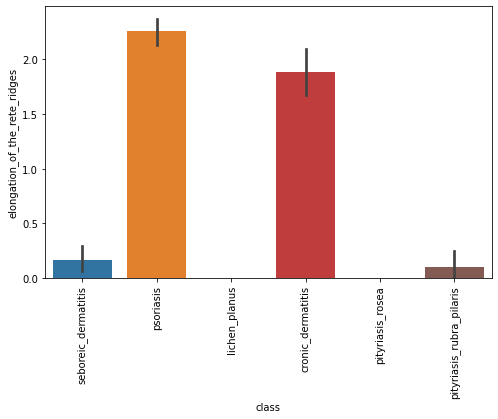

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y=data["elongation_of_the_rete_ridges"],x=data["class"])
plt.xticks(rotation=90)
plt.show()

It can be seen that along with "psoriasis" it is the second most effecting.
This feature is one which effects this skin disorder

6. PITYRIASIS_RUBRA_PILARIS

FEATURES EFFECTING THIS DISORDER MOST ARE AS FOLLOWS

knee_elbow_involvement

follicular_papules

perifollicular_parakeratosis

follicular_horn_plug

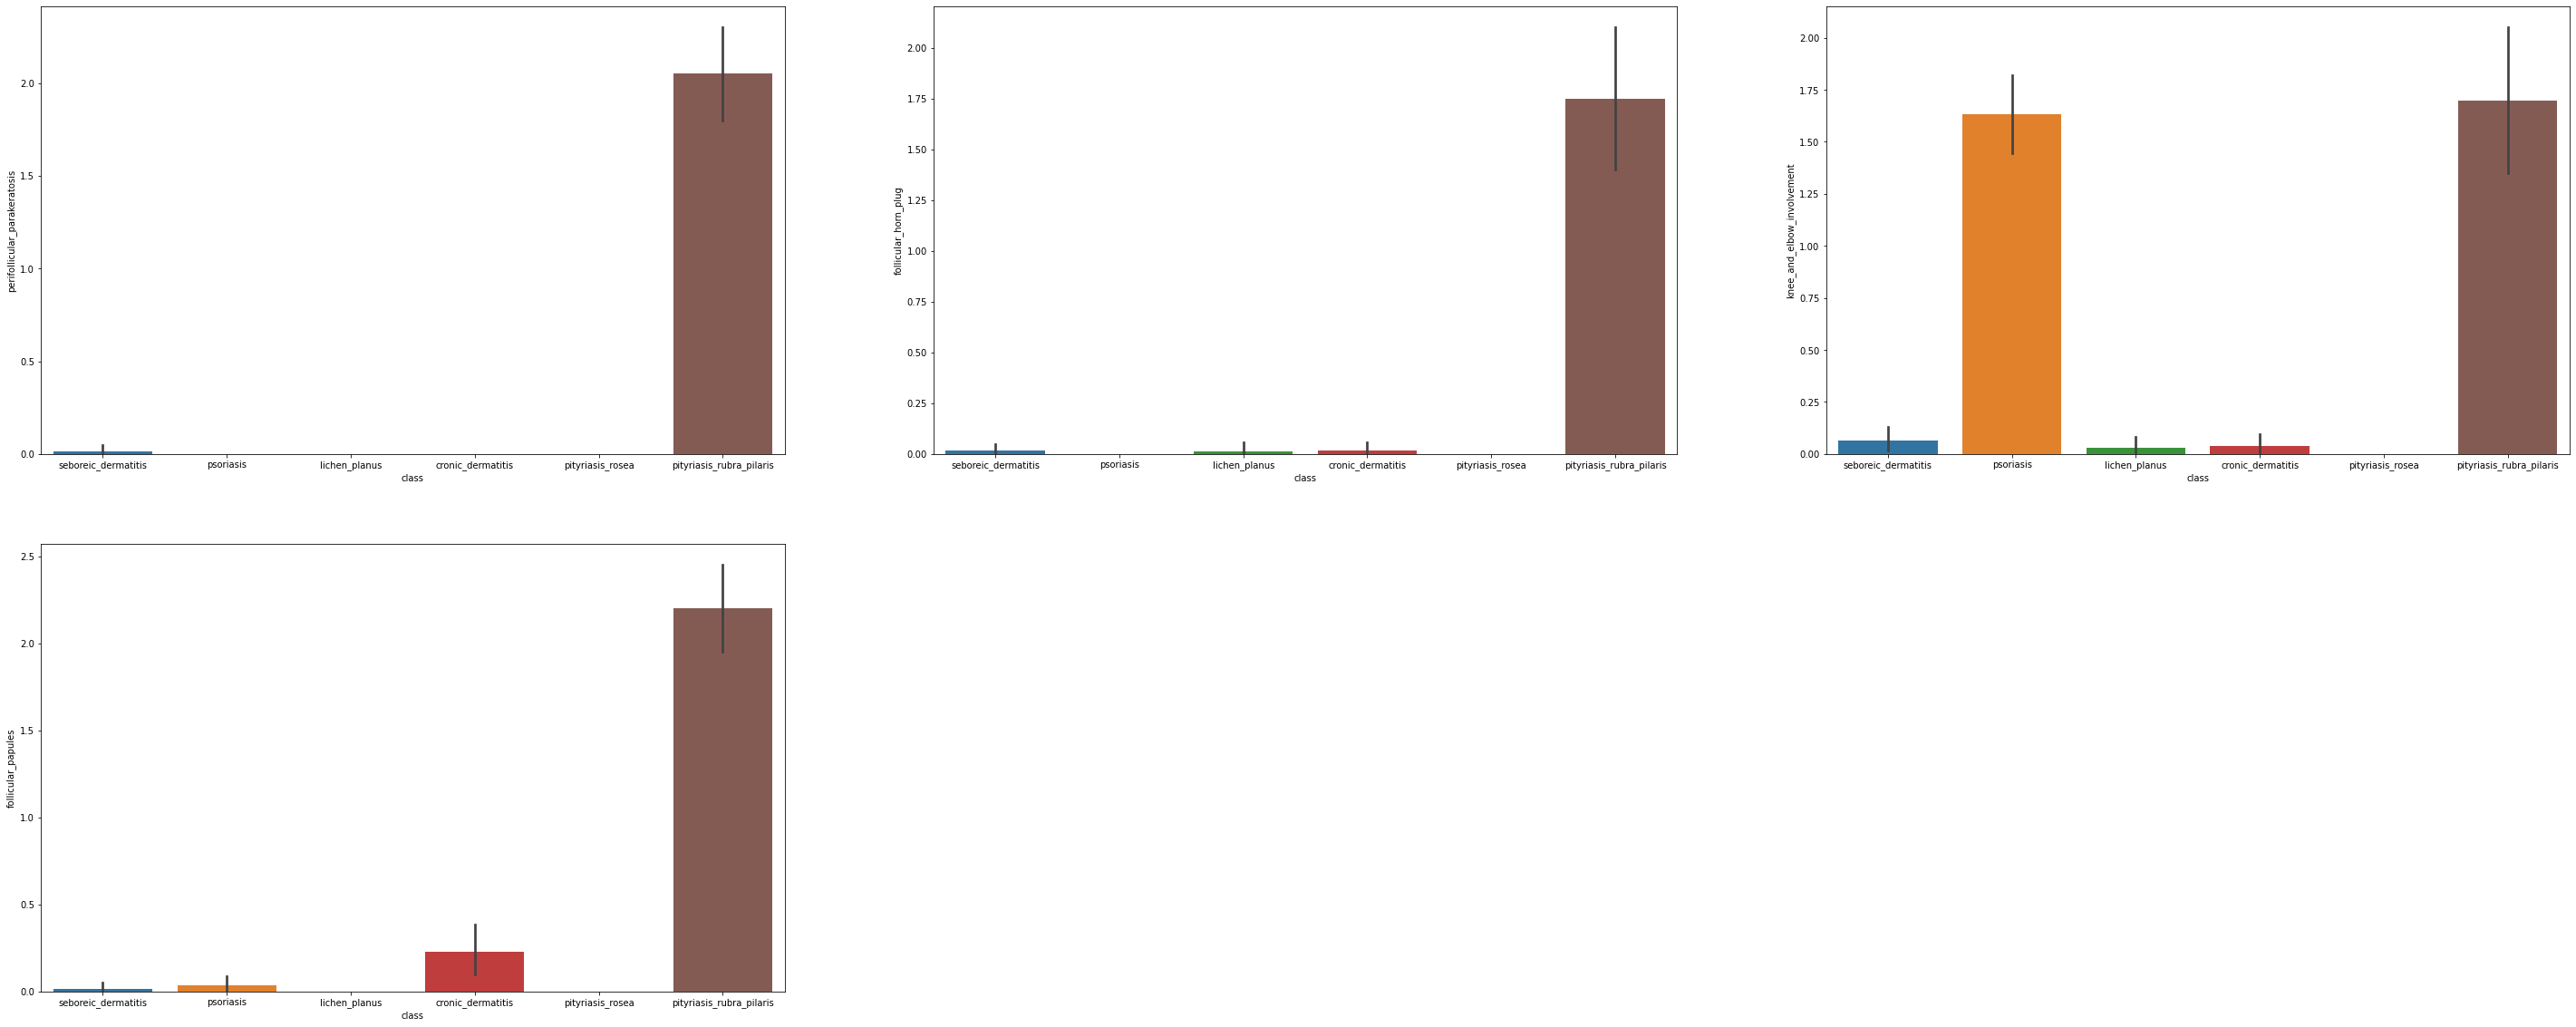

In [31]:
data1=data[["perifollicular_parakeratosis","follicular_horn_plug","knee_and_elbow_involvement","follicular_papules"]]
plt.figure(figsize=(50,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

If you see the graphs above, the brown bin is of pityriasis_rubra skin disorder.
So this is the only bin in these graph which is higher than all others. hence, this skin disorder is most effected by these features.

### MACHINE LEARNING MODEL CREATION TO DO PREDICTION:


In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [33]:
data = pd.read_csv('data.csv')


### DATA_PRE-PROCESSING:


### CHECKING NULL VALUES:


In [34]:
data.isnull().sum()


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

### HANDLING CORRUPTED VALUES:


In [35]:
data.loc[data['Age']=="?","Age"]=0


In [36]:
data[["Age"]]=data[["Age"]].astype("int64")


In [37]:
data.loc[data["Age"]==0,"Age"]=data["Age"].median()


### FEATURE SELECTION:


### CHECKING THE HIGHLY CO-RELATED FEATURES:


<AxesSubplot:>

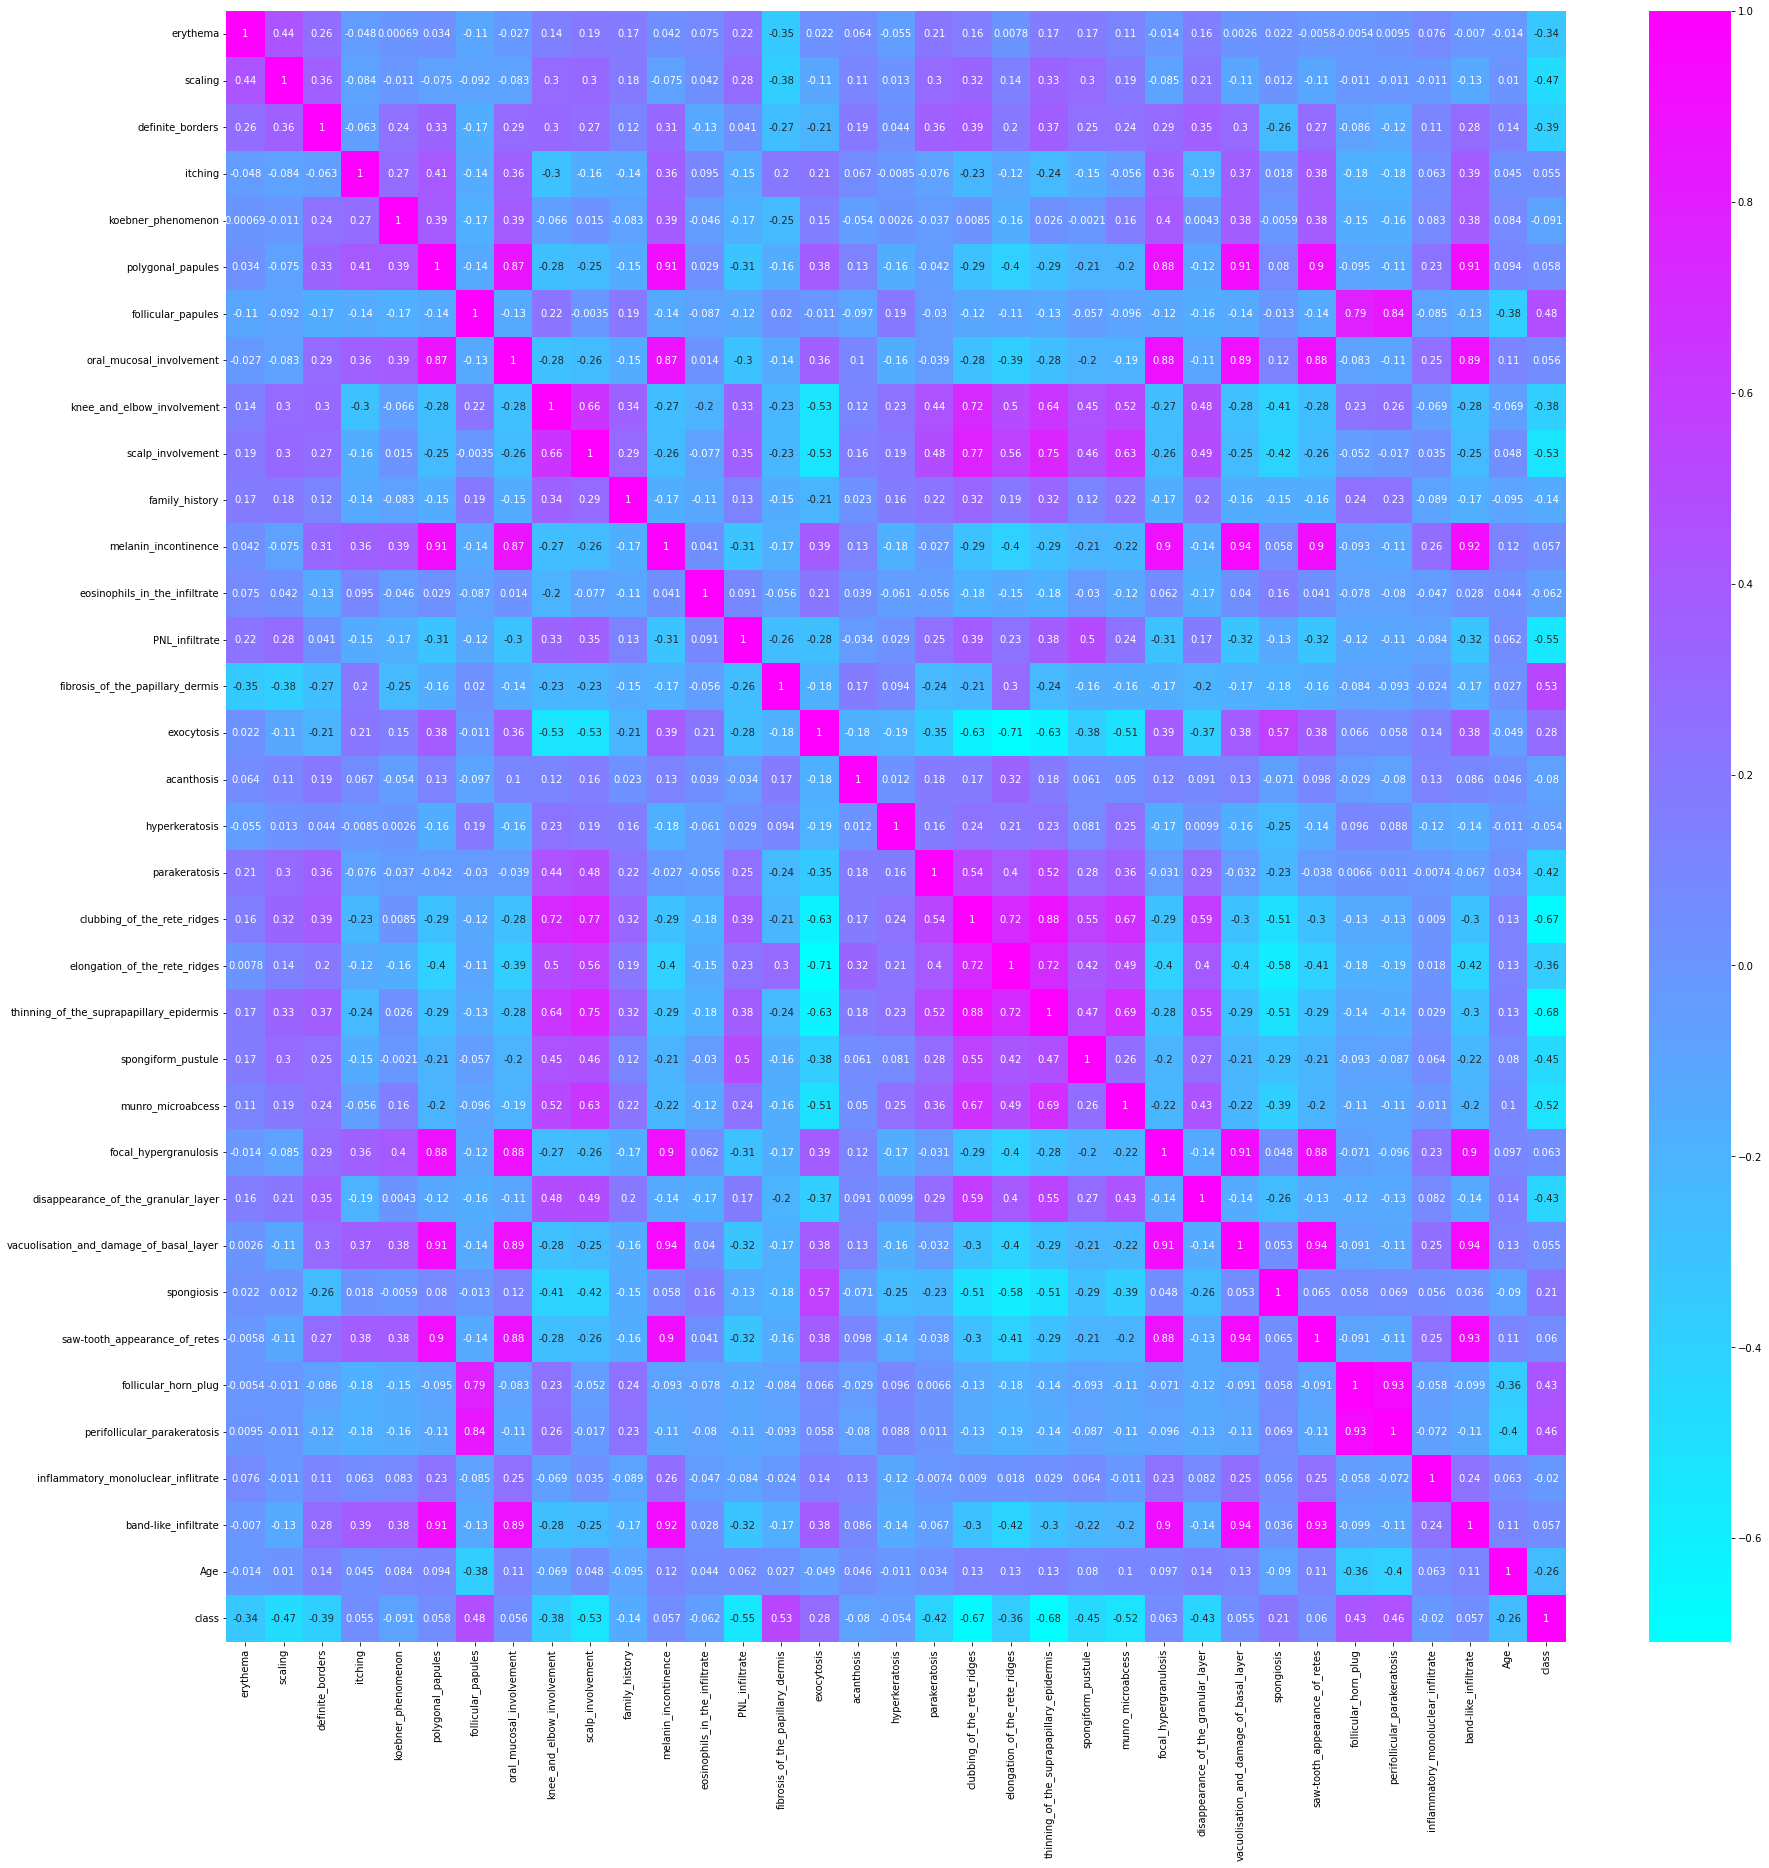

In [38]:

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="cool",annot=True)


# DROPPING FEAUTRES THAT HAVE LOW CORRELATION

In [39]:
data.drop(['polygonal_papules','melanin_incontinence',
           'focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer',
           'saw-tooth_appearance_of_retes','band-like_infiltrate'],axis=1,inplace=True)

### MODEL CREATION:


In [40]:

x=data.drop(["class"],axis=1)
y=data["class"]


### BALANCING THE DATA:


In [42]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("unbalanced data:  ",Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data:   Counter({1: 112, 3: 72, 2: 61, 5: 52, 4: 49, 6: 20})
balanced data:    : Counter({2: 112, 1: 112, 3: 112, 5: 112, 4: 112, 6: 112})


TRAIN-TEST SPLIT:


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.25)


In [44]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [45]:
y_hat = dt.predict(x_test)


In [46]:
acc=accuracy_score(y_test,y_hat)
acc

0.9761904761904762

CHECKING WHETHER DATA IS FULLY TRAINED OR NOT
`

In [48]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
y_pred=dt.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00        80

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [49]:
pd.crosstab(y_train,y_pred)


col_0,1,2,3,4,5,6
class,,,,,,
1,81,0,0,0,0,0
2,0,91,0,0,0,0
3,0,0,82,0,0,0
4,0,0,0,81,0,0
5,0,0,0,0,89,0
6,0,0,0,0,0,80


As from classification report given above we can conclude that this model is fit for this data because it is 100%training the data.
And confusion_matrix is the proof that it does not doing any false prediction.
Hence we can move further with this algorithm and do prediction on our data

PREDICTION ON TEST DATA:


In [50]:
y_hat=dt.predict(x_test)
y_hat

array([4, 2, 4, 6, 1, 4, 1, 2, 5, 2, 2, 5, 5, 4, 1, 1, 5, 6, 5, 3, 1, 6,
       2, 5, 6, 4, 4, 6, 3, 2, 3, 6, 6, 1, 4, 5, 3, 3, 1, 6, 6, 1, 2, 2,
       5, 4, 6, 4, 1, 4, 6, 4, 1, 5, 3, 6, 5, 1, 1, 4, 2, 2, 3, 1, 4, 6,
       6, 3, 6, 5, 1, 1, 1, 2, 5, 2, 5, 4, 4, 6, 3, 1, 5, 3, 6, 3, 4, 2,
       1, 4, 4, 5, 6, 6, 1, 3, 1, 4, 1, 6, 1, 4, 4, 4, 6, 4, 4, 4, 2, 3,
       3, 2, 1, 4, 2, 3, 4, 3, 5, 1, 3, 5, 6, 4, 1, 2, 2, 4, 6, 5, 3, 5,
       3, 3, 1, 4, 6, 1, 3, 5, 3, 6, 4, 3, 6, 2, 3, 3, 5, 3, 1, 6, 4, 1,
       6, 6, 6, 5, 4, 3, 2, 2, 3, 6, 6, 4, 5, 3], dtype=int64)

CHECKING CLASSIFICATION REPORT:


In [51]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.95      0.95      0.95        21
           3       1.00      0.97      0.98        30
           4       0.91      1.00      0.95        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



USING RANDOM FOREST ENSEMBLE TECHNIQUE TO IMPROVE THE MODEL PERFORMANCE


In [52]:
from sklearn.ensemble import RandomForestClassifier


In [53]:
rfc=RandomForestClassifier(n_estimators=450)


In [54]:
rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=450)

In [55]:
y_prediction=rfc.predict(x_test)


In [56]:
print(classification_report(y_test,y_prediction))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        30
           4       0.97      1.00      0.98        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [57]:
pd.crosstab(y_test,y_prediction)


col_0,1,2,3,4,5,6
class,,,,,,
1,31,0,0,0,0,0
2,0,20,0,1,0,0
3,0,0,30,0,0,0
4,0,0,0,31,0,0
5,0,0,0,0,23,0
6,0,0,0,0,0,32


CONCLUSION:

ACCORDING TO OUR BUSINESS CASE PROBLEM, THE RECALL SCORE SHOULD BE HIGH, AND ACC. TO THE CLASSIFICATION REPORT, RECALL SCORE IS 100% FOR 5 SKIN DISORDERS.

MEANS OVERALL OUR MODEL IS PERFORMING GOOD FOR THIS PROBLEM.

AND WE CAN CONCLUDE FROM OUR ACCURACY THAT OUR MODEL IS DOING 99% OF TRUE PREDICTIONS.